# Synthetic Accesibility Scores for COVID submissions

In [1]:
import numpy as np
import pandas as pd

In [2]:
import PIL #needed for IPythonConsole

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem

RDKit WARNING: [22:48:54] Enabling RDKit 2019.09.3 jupyter extensions


In [5]:
from os import listdir
from os.path import isfile, join
plans_path = './new_covid_synthesis_plans/'
html_files = [f for f in listdir(plans_path) if isfile(join(plans_path, f))]

In [6]:
syn_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1USA9yJ7CuCjQkqkqIQ2oEBCE-uhM6kLWWXUhBBiMo_c/export?gid=0&format=csv')
syn_df.head()

,SMILES,CID,creator,rationale,fragments,real_space,SCR,BB,link,covalent_frag,SA_score,avg_sa_score,MATT Comments,ALPHA comments
0,Clc1ccc(Cn2c(CN3CCCC3)nc3ccccc32)cc1,AME-NAT-624-1,"Ameya D Bendre, National centre for cell science",The molecule is clemizole (Not newly designed ...,x0072,FALSE,FALSE,FALSE,https://covid.postera.ai/covid/submissions/624...,False,1.829810,1.829810,NaN,NaN
1,N#Cc1cccc(NC(=O)Nc2cccnc2)c1,WAR-XCH-eb7-1,"Warren, XChem - Diamond Light Source",Combining fragments X0305 and X0434 by eye,"x0305,x0434",Z195739680,Z195739680,FALSE,https://covid.postera.ai/covid/submissions/eb7...,False,1.836199,1.842151,NaN,NaN
2,O=C(Nc1cccnc1)Nc1cc(Cl)cc(Cl)c1,WAR-XCH-eb7-3,"Warren, XChem - Diamond Light Source",Combining fragments X0305 and X0434 by eye,"x0305,x0434",FALSE,FALSE,FALSE,https://covid.postera.ai/covid/submissions/eb7...,False,1.857217,1.842151,NaN,NaN
3,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,WAR-XCH-eb7-2,"Warren, XChem - Diamond Light Source",Combining fragments X0305 and X0434 by eye,"x0305,x0434",FALSE,FALSE,FALSE,https://covid.postera.ai/covid/submissions/eb7...,False,2.052798,1.842151,NaN,NaN
4,O=C(Nc1cccnc1)Nc1cc(O)cc(Cl)c1,WAR-XCH-eb7-4,"Warren, XChem - Diamond Light Source",Combining fragments X0305 and X0434 by eye,"x0305,x0434",FALSE,FALSE,FALSE,https://covid.postera.ai/covid/submissions/eb7...,False,1.999026,1.842151,NaN,NaN


In [7]:
alpha_df = pd.read_excel('covid_SA_file_alpha_comments.xlsx')
alpha_df.head()

,Unnamed: 0,SMILES,MW,cLogP,SCORE,BB,CID,Postera Comments,Enamine Yes/No,Route,LINK
0,NaN,Cc1nnc(NC(=O)Nc2cccnc2)s1,235.052781,1.88552,0.979,"['EN300-17271', 'EN300-21243']",ALE-HEI-f28-4,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/f28...
1,NaN,Cc1ccncc1NC(=O)NC1(C#Cc2cccnc2)CC1,292.132411,2.49082,0.973,['EN300-51191'],CHR-SOS-6c4-11,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/6c4...
2,NaN,Cc1ccncc1NC(=O)CCNc1ccc(S(N)(=O)=O)cc1,334.109961,1.47812,0.681,['EN300-51191'],GAB-REV-70c-3,"NCCC(=O)Cl is unstable, Use EN300-18046 instead",NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/70c...
3,NaN,O=S1(=O)CCC(N2CCN(S(=O)(=O)c3ccccc3)CC2)CC1,358.102099,0.57010,0.940,"['EN300-31943', 'EN300-42287']",GIA-UNK-eaa-2,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/eaa...
4,NaN,O=C(CC1(c2ccccc2)CCCCC1)Nc1cccnc1,294.173213,4.31230,0.943,"['EN300-52411', 'EN300-21243']",CHR-SOS-f73-1,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/f73...


In [11]:
alpha_df = alpha_df.drop(columns=['Unnamed: 0'])

In [14]:
list(alpha_df.columns)

['SMILES',
 'MW',
 'cLogP',
 'SCORE',
 'BB',
 'CID',
 'Postera Comments',
 'Enamine Yes/No',
 'Route',
 'LINK']

In [25]:
smi_list = []
mw_list = []
clogp_list = []
cids_list = []
links_list = []
html_file_list = []

available_list = []
probs_list = []
sms = []

for html_file in html_files:
    
    cid = html_file.split('.html')[0].split('_')[0]
    smi = list(syn_df.loc[syn_df['CID']==cid]['SMILES'])[0]
    if (smi not in list(alpha_df.SMILES)) and (cid!='BAR-COM-569-4') and (cid!='JOR-UNI-2fc-11'):
        
        cids_list.append(cid)
        smi_list.append(smi)
        links_list.append(list(syn_df.loc[syn_df['CID']==cid]['link'])[0])

        mw_list.append(Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(smi)))
        clogp_list.append(Chem.Descriptors.MolLogP(Chem.MolFromSmiles(smi)))

        html_file_list.append(f'https://htmlpreview.github.io/?https://github.com/mc-robinson/sa_html_viewer/blob/master/covid_synthesis_plans/{html_file}')

        with open('./new_covid_synthesis_plans/' + html_file, 'r') as f:
            data = f.readlines()

        all_available = True
        mol_ids = []
        for line in data:
            mol_ids = []
            if 'OVERALL PROB:' in line:
                prob = line.split('</p>')[0].split('OVERALL PROB:')[-1].strip()
                probs_list.append(float(prob))
            if ' = ' in line:
                sublines = line.split("</p>")
                for subline in sublines:
                    if ((len(subline) >0) and ('Stock' not in subline) and ('Reactions' not in subline)
                        and ('*' not in subline)):
                        mol_id = subline.split(' = ')[-1]

                        if 'EN' not in mol_id:
                            all_nums = True
                            for char in mol_id:
                                if char.isalpha():
                                    all_nums = False
                            if all_nums:
                                all_available = False
                        else:
                            mol_ids.append(mol_id)
        available_list.append(all_available)
        sms.append(mol_ids)

In [29]:
sa_df = pd.DataFrame({
    'SMILES': smi_list,
    'MW': mw_list,
    'cLogP': clogp_list,
    'SCORE': probs_list,
    'BB': sms,
    'CID': cids_list,
    'Postera Comments': [np.nan]*len(smi_list),
    'Enamine Yes/No': [np.nan]*len(smi_list),
    'Route': html_file_list,
    'LINK': links_list,
})

In [30]:
sa_df

,SMILES,MW,cLogP,SCORE,BB,CID,Postera Comments,Enamine Yes/No,Route,LINK
0,N#Cc1cncc(Nc2c(Nc3cccnc3)c(=O)c2=O)c1,291.075625,1.43148,0.848,"[EN300-96940, EN300-21243]",JAN-UNI-2e9-1,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/2e9...
1,Cc1cnc(CC(=O)Nc2cccnc2)o1,217.085127,1.55922,0.918,[EN300-91180],DAR-DIA-842-16,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/842...
2,N#Cc1ncc(N2CCCOCC2)cc1F,221.096440,1.31908,0.971,[],JOH-UNI-9dc-1,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/9dc...
3,N=C(N)CCCCN1CCCc2ccc(S(N)(=O)=O)cc21,310.146347,1.19287,0.743,[],PET-SGC-6a1-1,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/6a1...
4,COC(C)CN(Cc1ccsc1)C(=O)Cn1nnc2ccccc21,344.130697,2.55650,0.989,[EN300-00788],RUT-UNI-630-19,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/630...
5,NS(=O)(=O)c1ccc2c(c1)N(CCN1CCC(O)CC1)CCC2,339.161663,0.54330,0.974,[EN300-82147],PET-SGC-908-1,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/908...
6,CS(=O)(=O)NCCOC(C(=O)Nc1cccnc1)c1ccccc1,349.109627,1.32720,0.858,"[EN300-129867, EN300-1238839]",ADA-UNI-f8e-1,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/f8e...
7,CC1C(C)N(c2ccc(C#N)nc2)CCN1C,230.153147,1.48208,0.903,"[EN300-96551, EN300-124962]",JOH-UNI-522-6,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/522...
8,O=C(Nc1cccnc1)c1ccc(N2CCCOCC2)cn1,298.142976,1.95560,0.937,"[EN300-67213, EN300-59725]",JOH-UNI-abd-1,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/abd...
9,O=C1C(c2ccccc2)CCCN1c1cccnc1,252.126263,2.99220,0.559,[EN300-107267],DAR-DIA-fc9-7,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/fc9...


In [31]:
overall_df = pd.concat([alpha_df, sa_df])

In [32]:
from rdkit.Chem import PandasTools

In [33]:
overall_df.head()

,SMILES,MW,cLogP,SCORE,BB,CID,Postera Comments,Enamine Yes/No,Route,LINK
0,Cc1nnc(NC(=O)Nc2cccnc2)s1,235.052781,1.88552,0.979,"['EN300-17271', 'EN300-21243']",ALE-HEI-f28-4,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/f28...
1,Cc1ccncc1NC(=O)NC1(C#Cc2cccnc2)CC1,292.132411,2.49082,0.973,['EN300-51191'],CHR-SOS-6c4-11,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/6c4...
2,Cc1ccncc1NC(=O)CCNc1ccc(S(N)(=O)=O)cc1,334.109961,1.47812,0.681,['EN300-51191'],GAB-REV-70c-3,"NCCC(=O)Cl is unstable, Use EN300-18046 instead",NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/70c...
3,O=S1(=O)CCC(N2CCN(S(=O)(=O)c3ccccc3)CC2)CC1,358.102099,0.57010,0.940,"['EN300-31943', 'EN300-42287']",GIA-UNK-eaa-2,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/eaa...
4,O=C(CC1(c2ccccc2)CCCCC1)Nc1cccnc1,294.173213,4.31230,0.943,"['EN300-52411', 'EN300-21243']",CHR-SOS-f73-1,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/f73...


In [34]:
PandasTools.AddMoleculeColumnToFrame(overall_df, smilesCol='SMILES')

In [37]:
overall_df = overall_df.reset_index(drop=True)

,SMILES,MW,cLogP,SCORE,BB,CID,Postera Comments,Enamine Yes/No,Route,LINK,ROMol
0,Cc1nnc(NC(=O)Nc2cccnc2)s1,235.052781,1.88552,0.979,"['EN300-17271', 'EN300-21243']",ALE-HEI-f28-4,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/f28...,
1,Cc1ccncc1NC(=O)NC1(C#Cc2cccnc2)CC1,292.132411,2.49082,0.973,['EN300-51191'],CHR-SOS-6c4-11,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/6c4...,
2,Cc1ccncc1NC(=O)CCNc1ccc(S(N)(=O)=O)cc1,334.109961,1.47812,0.681,['EN300-51191'],GAB-REV-70c-3,"NCCC(=O)Cl is unstable, Use EN300-18046 instead",NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/70c...,
3,O=S1(=O)CCC(N2CCN(S(=O)(=O)c3ccccc3)CC2)CC1,358.102099,0.57010,0.940,"['EN300-31943', 'EN300-42287']",GIA-UNK-eaa-2,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/eaa...,
4,O=C(CC1(c2ccccc2)CCCCC1)Nc1cccnc1,294.173213,4.31230,0.943,"['EN300-52411', 'EN300-21243']",CHR-SOS-f73-1,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/f73...,
5,Cc1ccncc1NC(=O)CNc1c[nH]c2ccccc12,280.132411,2.92192,0.498,['EN300-65474'],GAB-REV-70c-17,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/70c...,
6,Cc1ccncc1NC(=O)CCCBr,256.021125,2.50362,0.943,"['EN300-20415', 'EN300-51191']",ALE-HEI-f28-12,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/f28...,
7,CCNc1ccc(-c2cccc(=O)[nH]2)cn1,215.105862,1.86870,0.926,['EN300-109418'],ANN-UNI-263-1,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/263...,
8,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,261.066890,3.68742,0.945,"['EN300-18057', 'EN300-51191']",TRY-UNI-714-12,pyridine not available,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/714...,
9,CCNc1ncc(C#N)cc1NC(=O)Nc1cnccc1C,296.138559,2.73250,0.942,['EN300-155041'],TRY-UNI-1fd-2,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/1fd...,

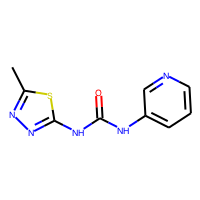
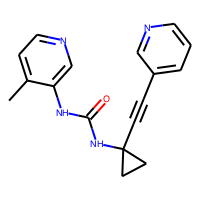
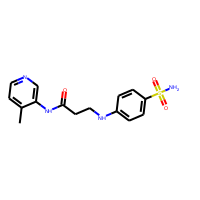
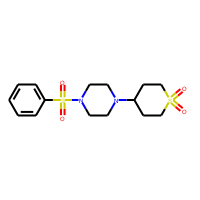
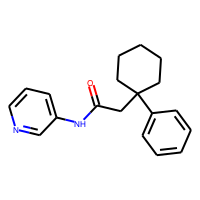
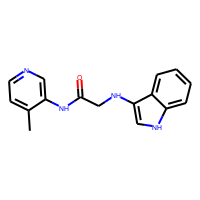
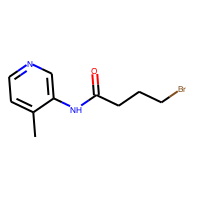
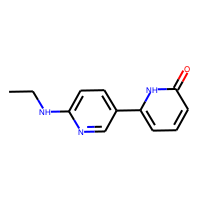
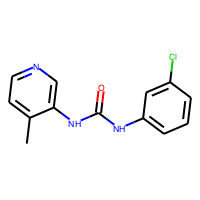
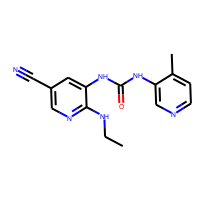
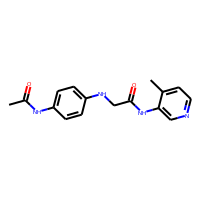
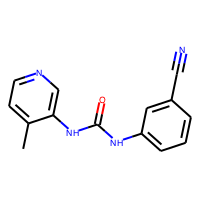
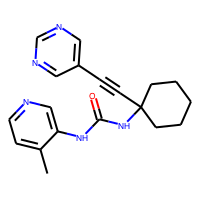
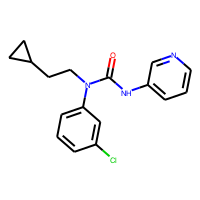
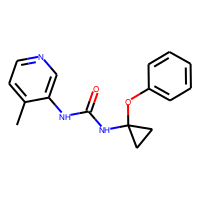
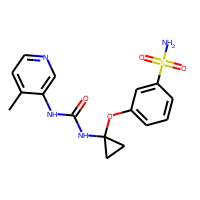
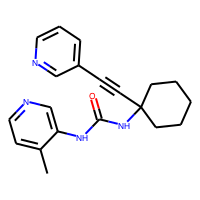
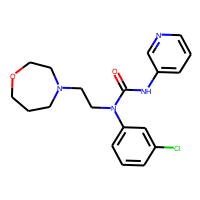
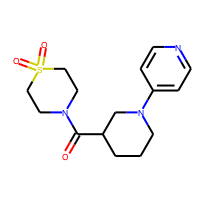
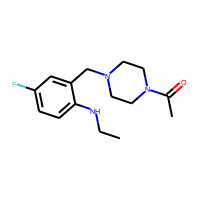
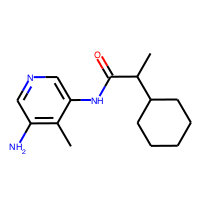
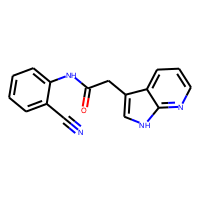
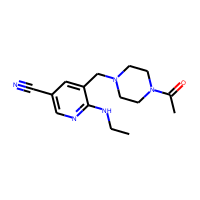
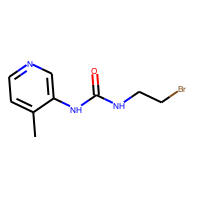
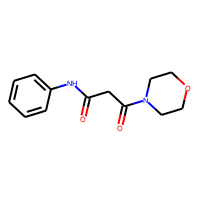
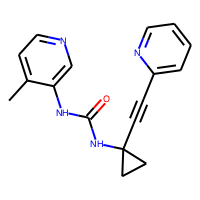
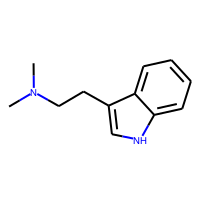
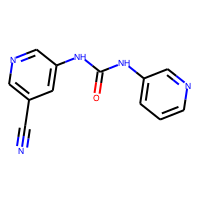
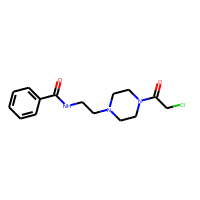
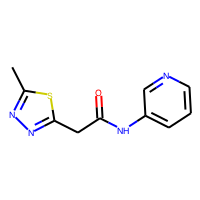
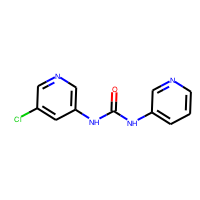
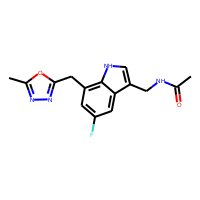
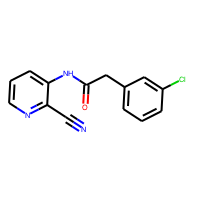
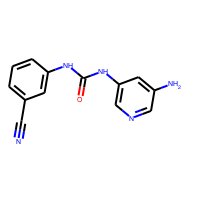
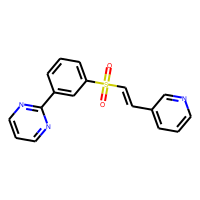
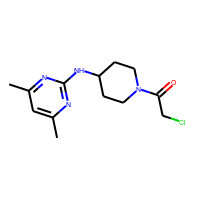
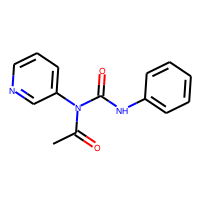
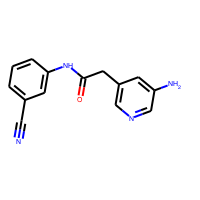
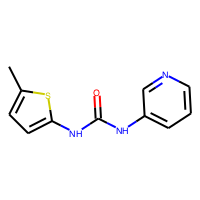
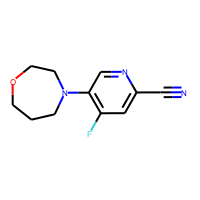
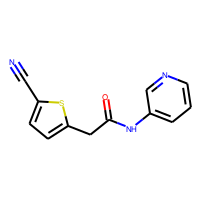
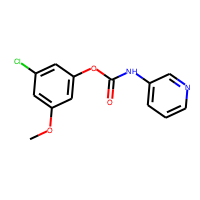
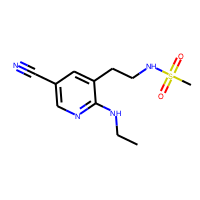
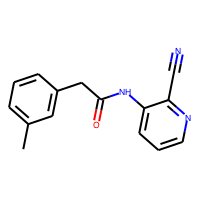
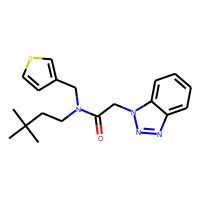
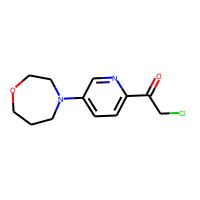
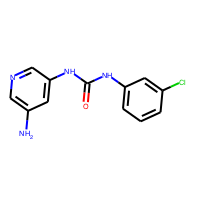
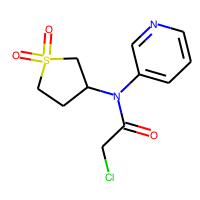
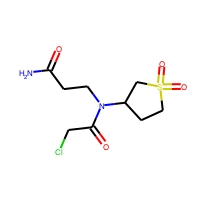
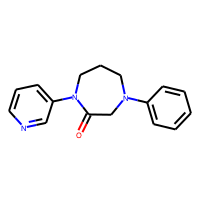
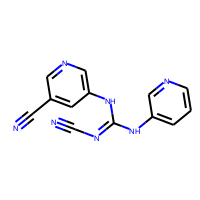
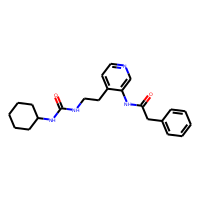
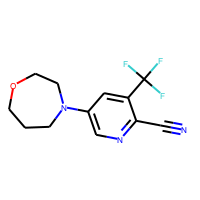
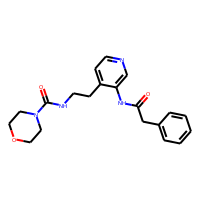
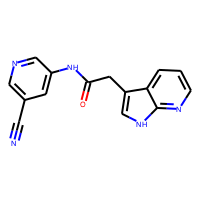
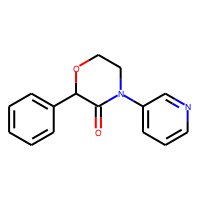
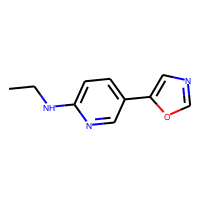
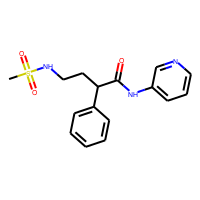
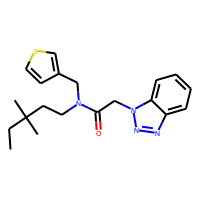
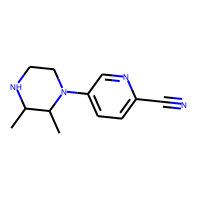

In [38]:
overall_df

In [39]:
cols = overall_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('ROMol')))
overall_df = overall_df.reindex(columns= cols)

,ROMol,SMILES,MW,cLogP,SCORE,BB,CID,Postera Comments,Enamine Yes/No,Route,LINK
0,,Cc1nnc(NC(=O)Nc2cccnc2)s1,235.052781,1.88552,0.979,"['EN300-17271', 'EN300-21243']",ALE-HEI-f28-4,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/f28...
1,,Cc1ccncc1NC(=O)NC1(C#Cc2cccnc2)CC1,292.132411,2.49082,0.973,['EN300-51191'],CHR-SOS-6c4-11,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/6c4...
2,,Cc1ccncc1NC(=O)CCNc1ccc(S(N)(=O)=O)cc1,334.109961,1.47812,0.681,['EN300-51191'],GAB-REV-70c-3,"NCCC(=O)Cl is unstable, Use EN300-18046 instead",NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/70c...
3,,O=S1(=O)CCC(N2CCN(S(=O)(=O)c3ccccc3)CC2)CC1,358.102099,0.57010,0.940,"['EN300-31943', 'EN300-42287']",GIA-UNK-eaa-2,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/eaa...
4,,O=C(CC1(c2ccccc2)CCCCC1)Nc1cccnc1,294.173213,4.31230,0.943,"['EN300-52411', 'EN300-21243']",CHR-SOS-f73-1,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/f73...
5,,Cc1ccncc1NC(=O)CNc1c[nH]c2ccccc12,280.132411,2.92192,0.498,['EN300-65474'],GAB-REV-70c-17,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/70c...
6,,Cc1ccncc1NC(=O)CCCBr,256.021125,2.50362,0.943,"['EN300-20415', 'EN300-51191']",ALE-HEI-f28-12,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/f28...
7,,CCNc1ccc(-c2cccc(=O)[nH]2)cn1,215.105862,1.86870,0.926,['EN300-109418'],ANN-UNI-263-1,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/263...
8,,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,261.066890,3.68742,0.945,"['EN300-18057', 'EN300-51191']",TRY-UNI-714-12,pyridine not available,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/714...
9,,CCNc1ncc(C#N)cc1NC(=O)Nc1cnccc1C,296.138559,2.73250,0.942,['EN300-155041'],TRY-UNI-1fd-2,NaN,NaN,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/1fd...

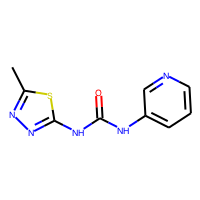
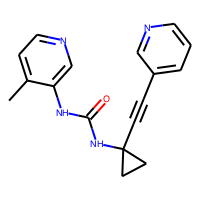
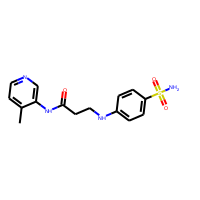
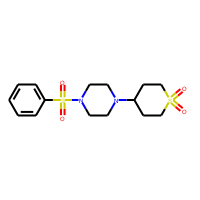
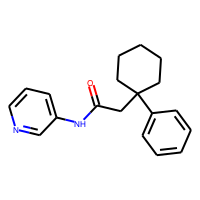
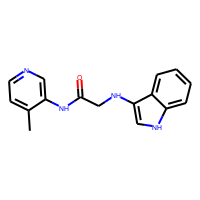
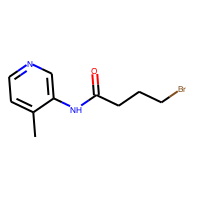
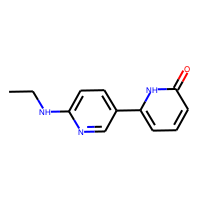
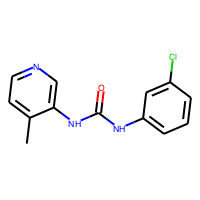
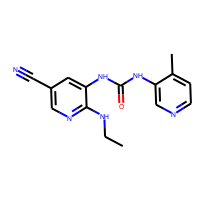
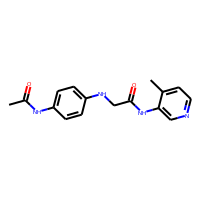
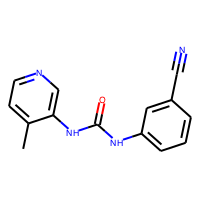
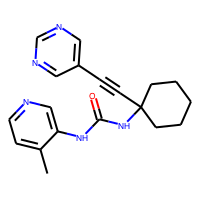
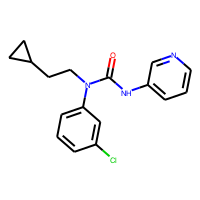
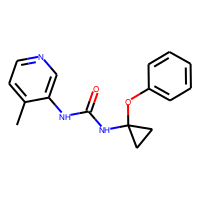
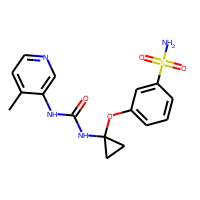
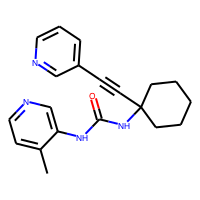
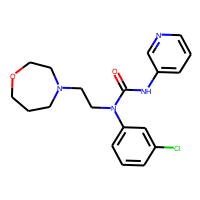
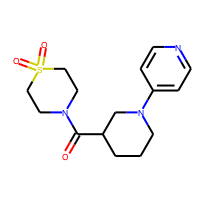
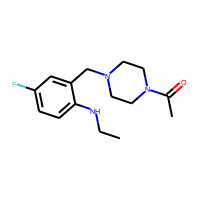
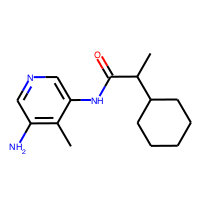
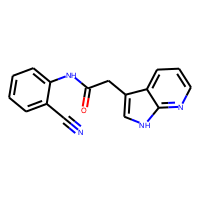
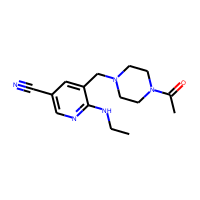
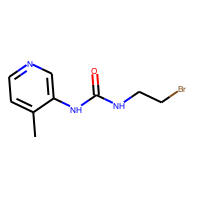
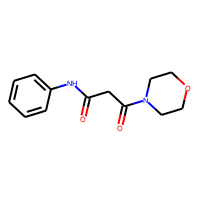
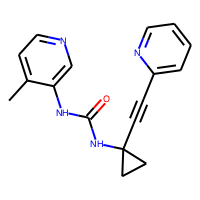
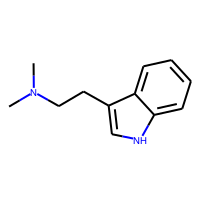
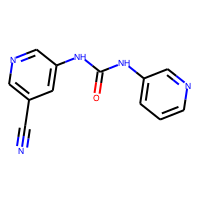
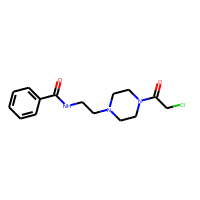
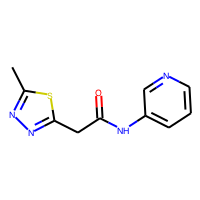
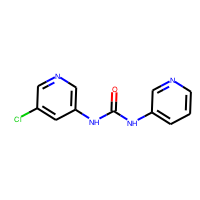
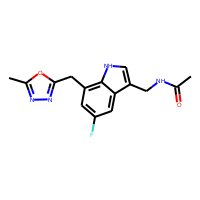
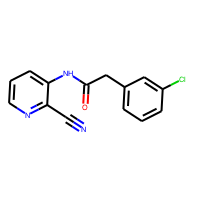
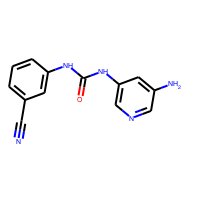
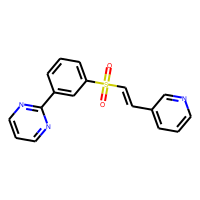
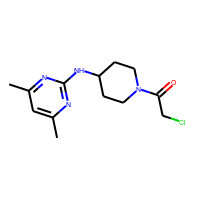
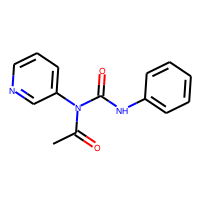
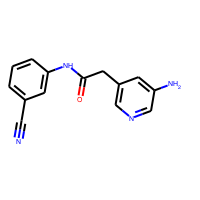
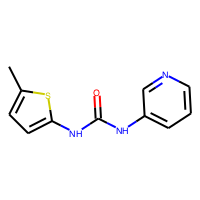
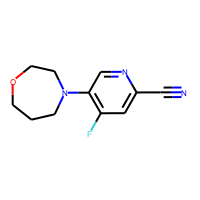
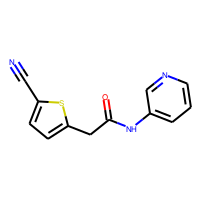
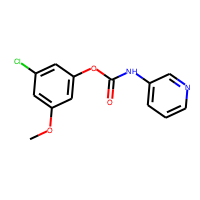
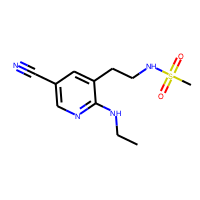
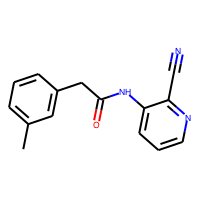
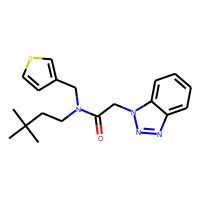
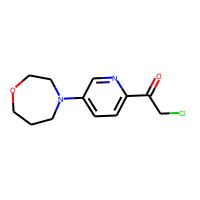
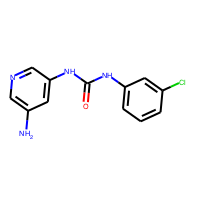
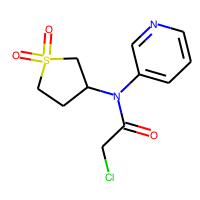
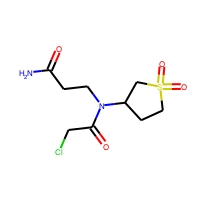
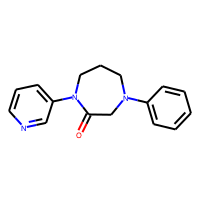
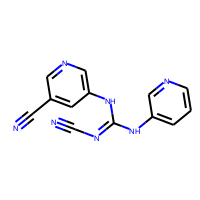
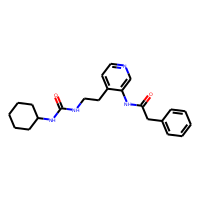
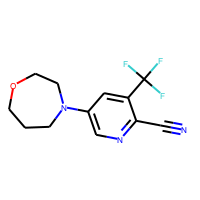
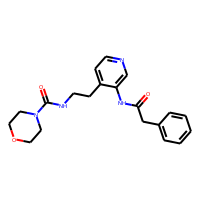
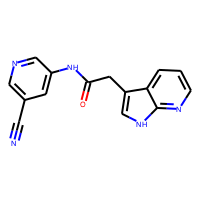
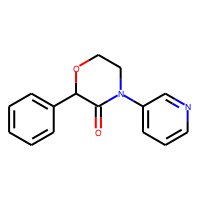
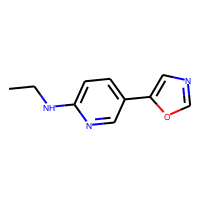
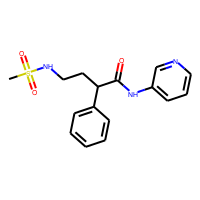
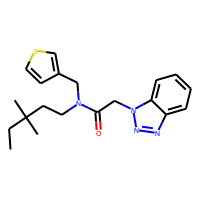
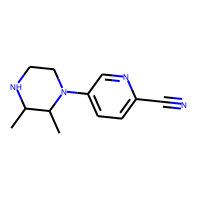

In [40]:
overall_df

In [42]:
overall_df = overall_df.replace(np.nan, '', regex=True)

,ROMol,SMILES,MW,cLogP,SCORE,BB,CID,Postera Comments,Enamine Yes/No,Route,LINK
0,,Cc1nnc(NC(=O)Nc2cccnc2)s1,235.052781,1.88552,0.979,"['EN300-17271', 'EN300-21243']",ALE-HEI-f28-4,,,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/f28...
1,,Cc1ccncc1NC(=O)NC1(C#Cc2cccnc2)CC1,292.132411,2.49082,0.973,['EN300-51191'],CHR-SOS-6c4-11,,,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/6c4...
2,,Cc1ccncc1NC(=O)CCNc1ccc(S(N)(=O)=O)cc1,334.109961,1.47812,0.681,['EN300-51191'],GAB-REV-70c-3,"NCCC(=O)Cl is unstable, Use EN300-18046 instead",,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/70c...
3,,O=S1(=O)CCC(N2CCN(S(=O)(=O)c3ccccc3)CC2)CC1,358.102099,0.57010,0.940,"['EN300-31943', 'EN300-42287']",GIA-UNK-eaa-2,,,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/eaa...
4,,O=C(CC1(c2ccccc2)CCCCC1)Nc1cccnc1,294.173213,4.31230,0.943,"['EN300-52411', 'EN300-21243']",CHR-SOS-f73-1,,,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/f73...
5,,Cc1ccncc1NC(=O)CNc1c[nH]c2ccccc12,280.132411,2.92192,0.498,['EN300-65474'],GAB-REV-70c-17,,,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/70c...
6,,Cc1ccncc1NC(=O)CCCBr,256.021125,2.50362,0.943,"['EN300-20415', 'EN300-51191']",ALE-HEI-f28-12,,,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/f28...
7,,CCNc1ccc(-c2cccc(=O)[nH]2)cn1,215.105862,1.86870,0.926,['EN300-109418'],ANN-UNI-263-1,,,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/263...
8,,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,261.066890,3.68742,0.945,"['EN300-18057', 'EN300-51191']",TRY-UNI-714-12,pyridine not available,,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/714...
9,,CCNc1ncc(C#N)cc1NC(=O)Nc1cnccc1C,296.138559,2.73250,0.942,['EN300-155041'],TRY-UNI-1fd-2,,,https://htmlpreview.github.io/?https://github....,https://covid.postera.ai/covid/submissions/1fd...

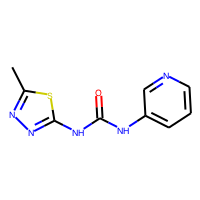
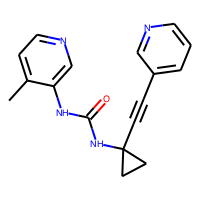
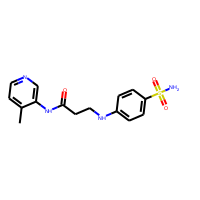
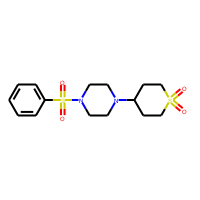
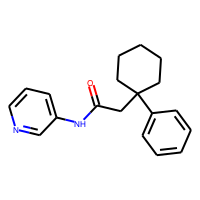
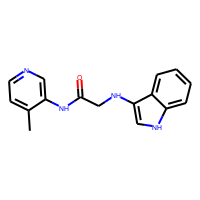
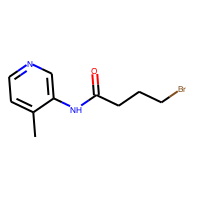
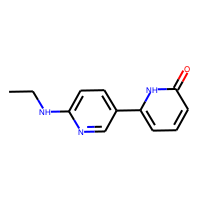
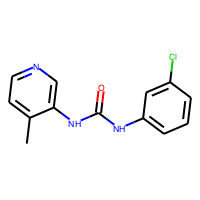
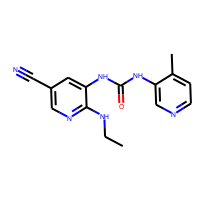
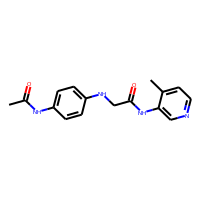
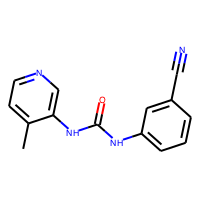
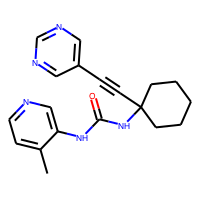
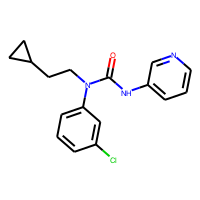
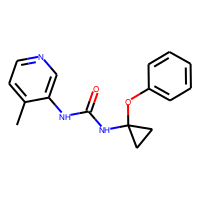
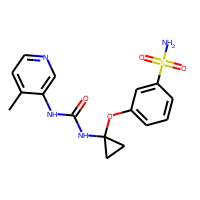
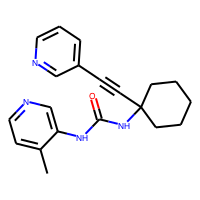
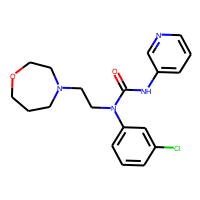
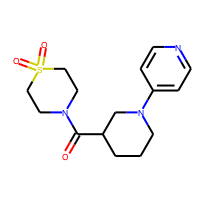
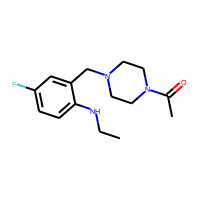
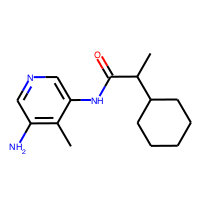
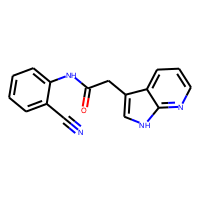
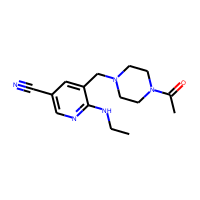
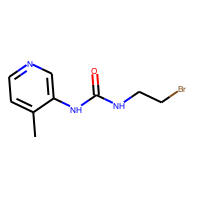
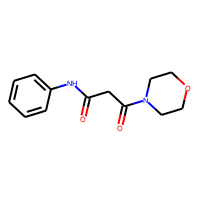
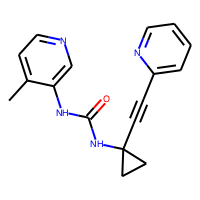
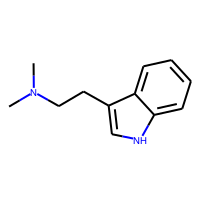
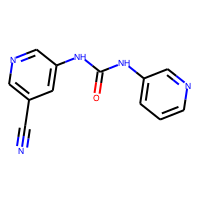
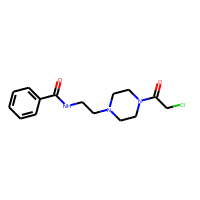
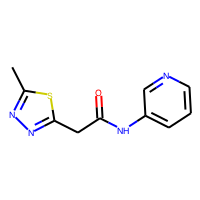
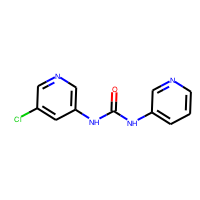
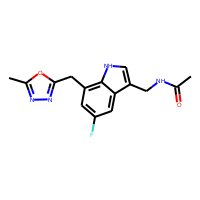
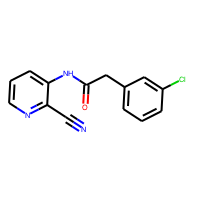
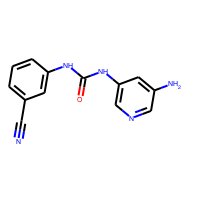
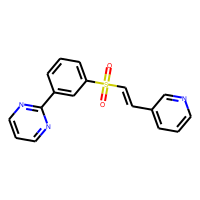
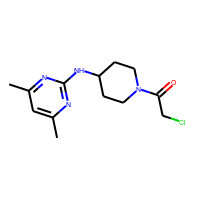
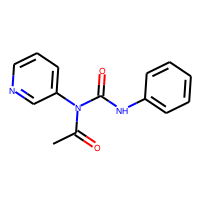
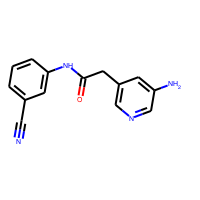
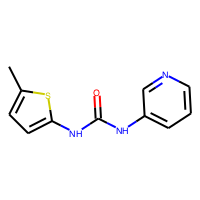
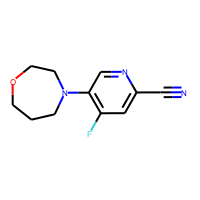
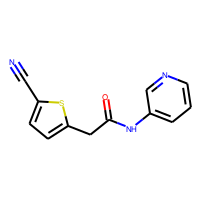
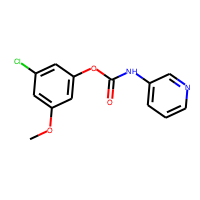
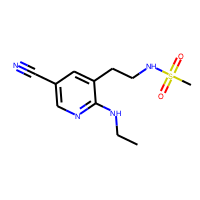
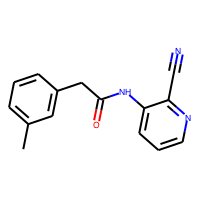
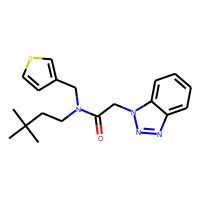
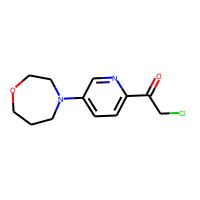
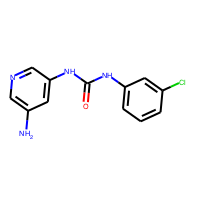
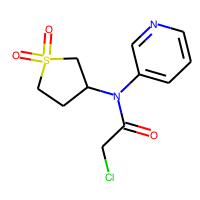
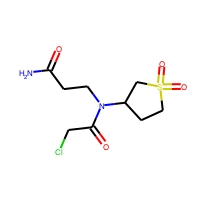
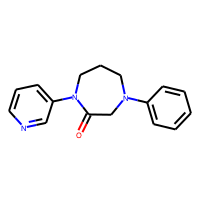
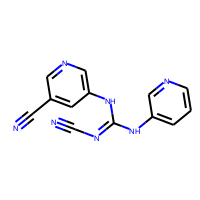
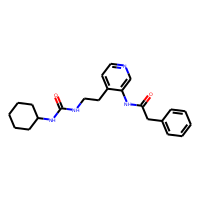
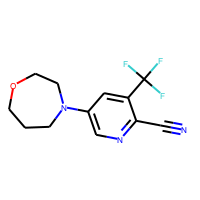
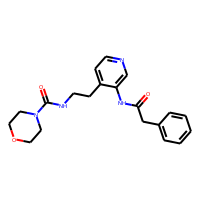
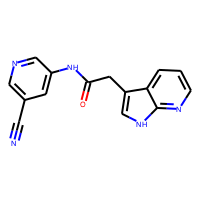
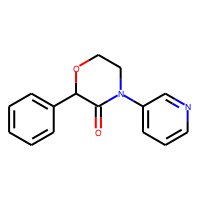
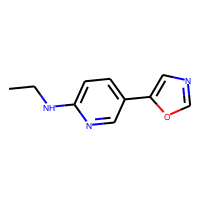
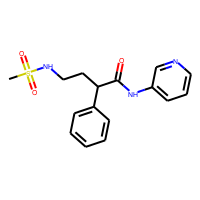
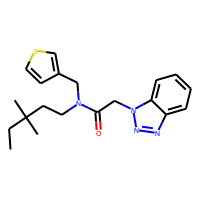
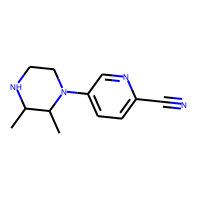

In [43]:
overall_df

In [44]:
Chem.PandasTools.SaveXlsxFromFrame(overall_df, 'covid_SA_file.xlsx', size=(100, 100))

In [113]:
#new_df = pd.read_excel('./covid_SA_file.xlsx')

In [115]:
#new_df['logP'] = new_df['SMILES'].apply(lambda x: Chem.Descriptors.MolLogP(Chem.MolFromSmiles(x)))

In [117]:
#new_df.to_csv('logP.csv')